In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
data = pd.read_csv('./Automobile_data.csv')

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [6]:
data['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

(array([ 8.,  9., 83., 42., 24., 14., 15.,  3.,  6.,  1.]),
 array([ 86.6 ,  90.03,  93.46,  96.89, 100.32, 103.75, 107.18, 110.61,
        114.04, 117.47, 120.9 ]),
 <a list of 10 Patch objects>)

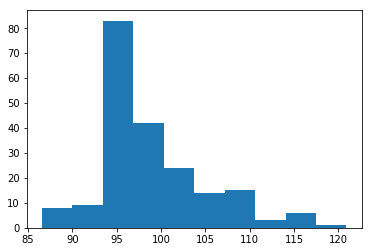

In [7]:
plt.hist(data['wheel-base'])

H:\ML_Test\test\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


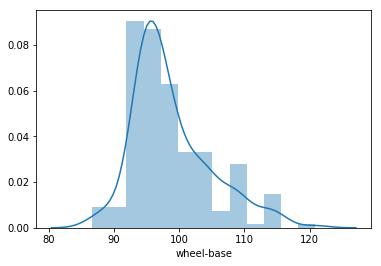

In [8]:
sns.distplot(data['wheel-base'])

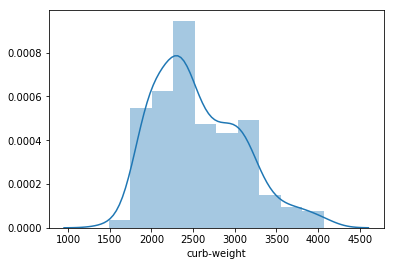

In [9]:
sns.distplot(data['curb-weight'])

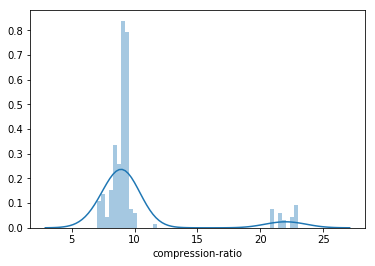

In [10]:
sns.distplot(data['compression-ratio'])

##### Convert Strign Object Series,price to numeric type for visualisation

In [11]:
data['price'] = data['price'].replace({'?':None})

In [12]:
data = data.dropna(axis=0)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    201 non-null object
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-nul

In [14]:
data['price'] = pd.to_numeric(data['price'])

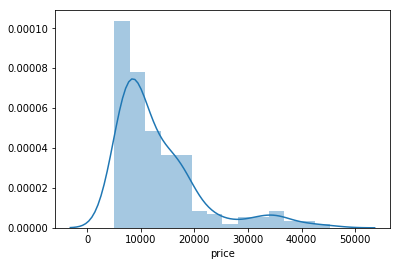

In [15]:
sns.distplot(data['price'])

#### Data Exploration

In [16]:
data_numeric = data.select_dtypes(include=['float64','int','int64'])
data_numeric.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450


In [17]:
data_numeric = data_numeric.drop(['symboling'],axis=1)

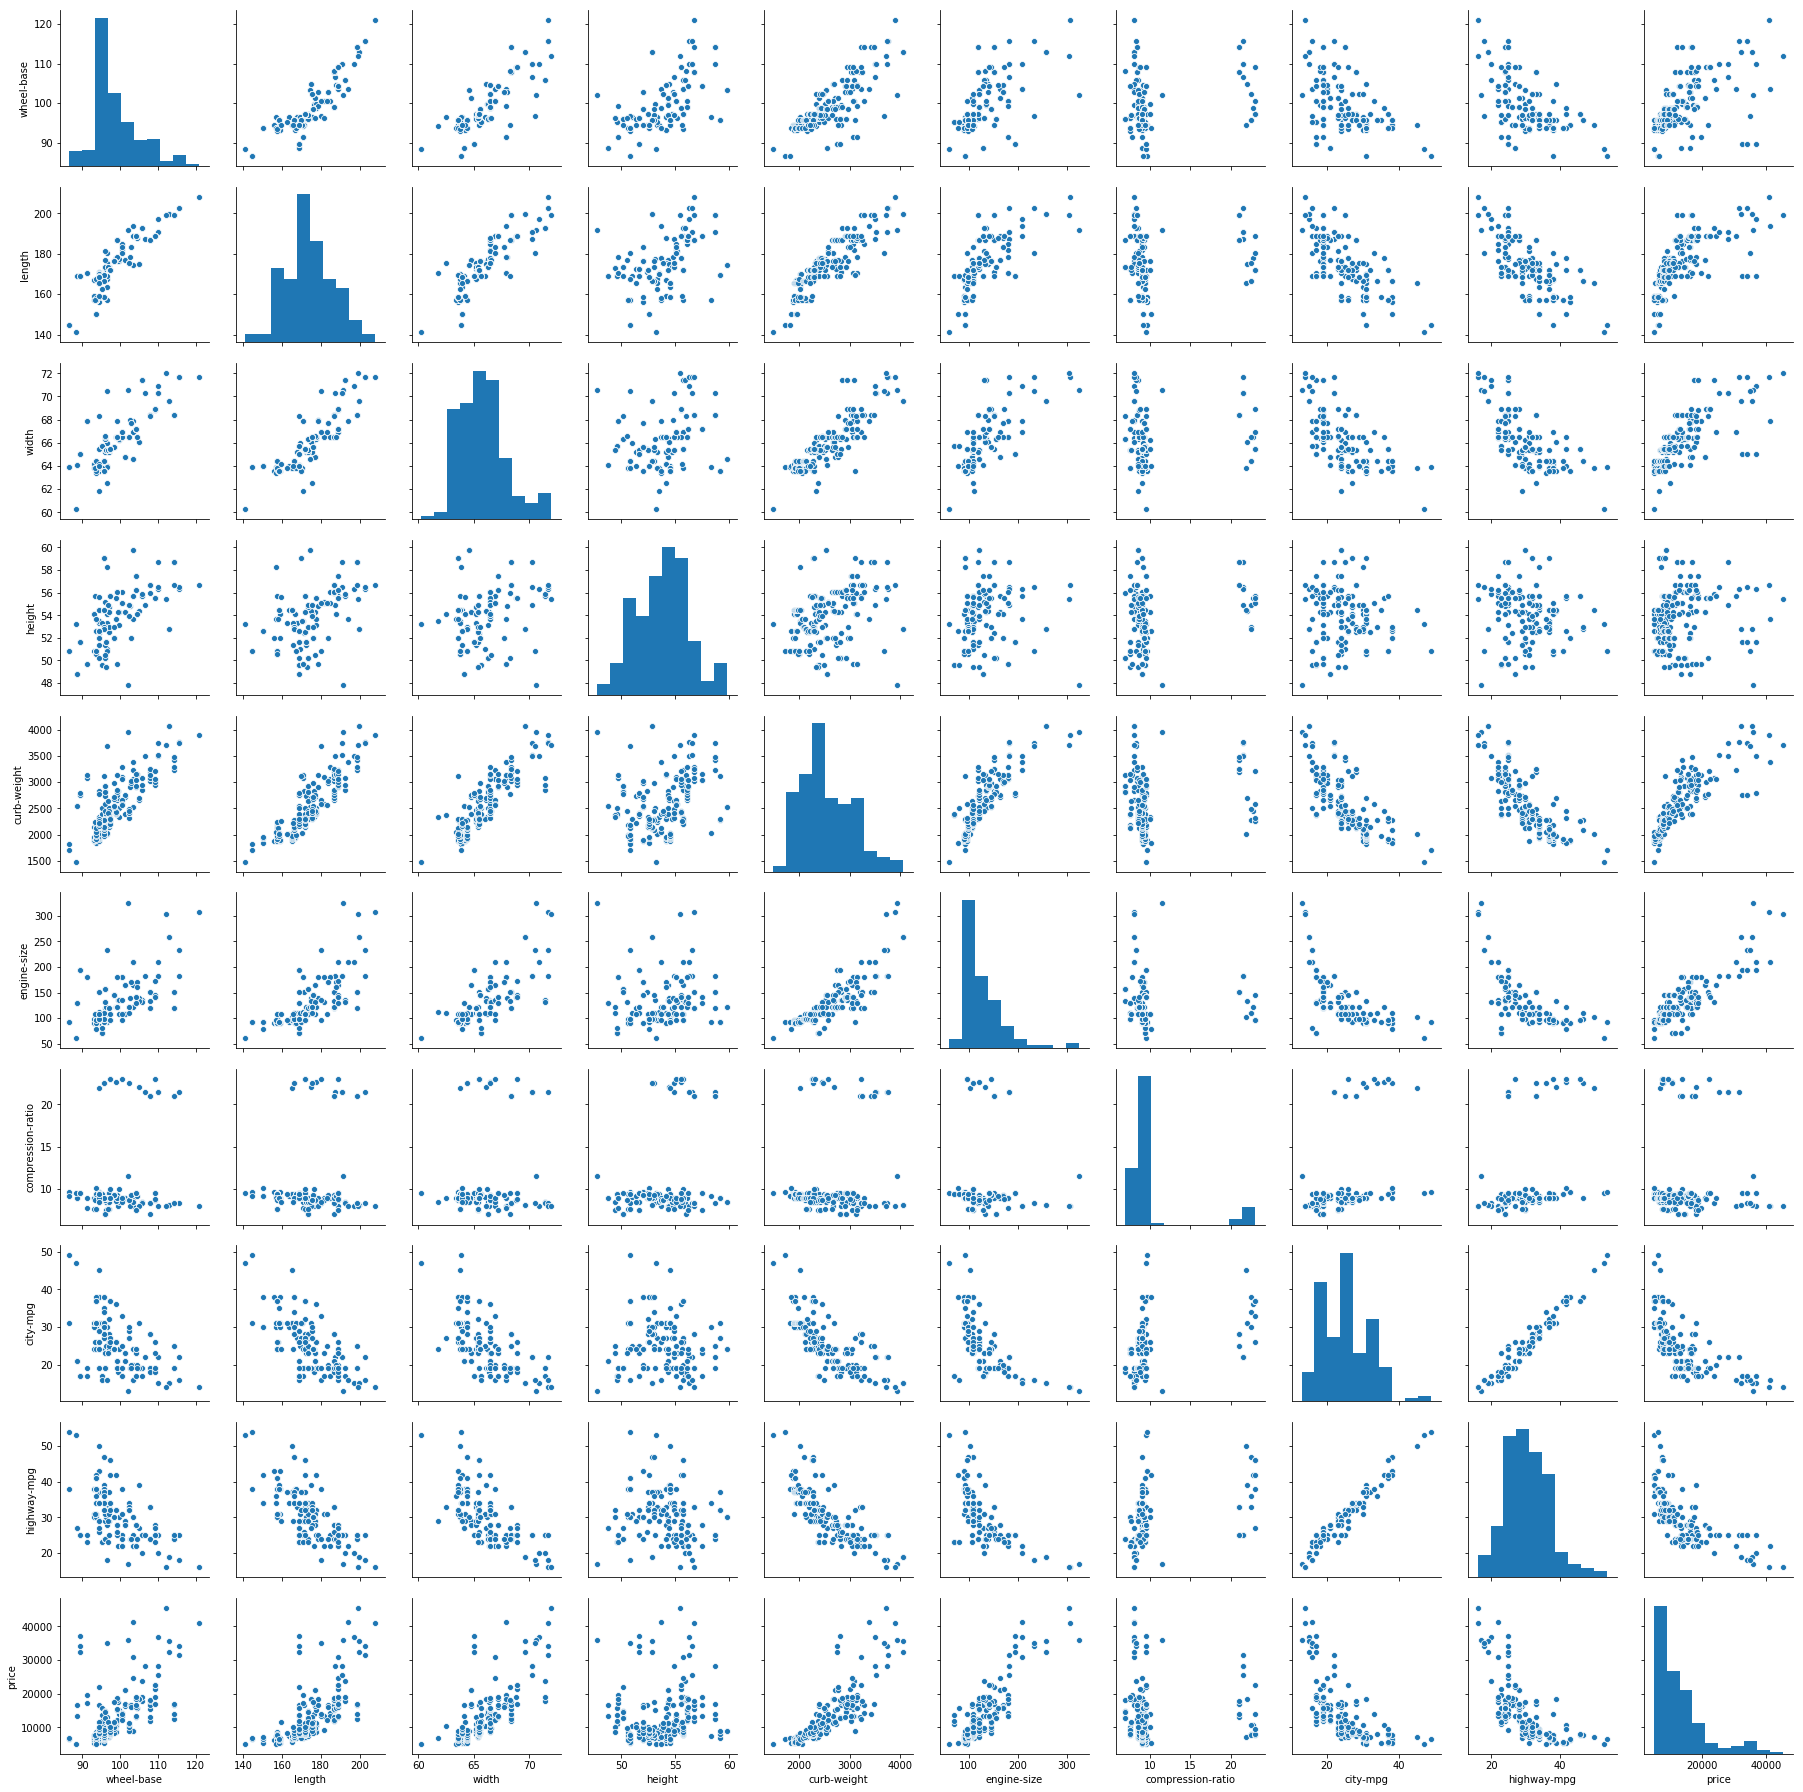

In [18]:
sns.pairplot(data_numeric)

In [19]:
data_correlation = data_numeric.corr()

In [20]:
data_correlation

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
wheel-base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.250313,-0.470606,-0.543304,0.584642
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.159733,-0.665192,-0.698142,0.690628
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.189867,-0.633531,-0.680635,0.751265
height,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.259737,-0.049800,-0.104812,0.135486
curb-weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.156433,-0.749543,-0.794889,0.834415
engine-size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.028889,-0.650546,-0.679571,0.872335
compression-ratio,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,1.000000,0.331425,0.268465,0.071107
city-mpg,-0.470606,-0.665192,-0.633531,-0.049800,-0.749543,-0.650546,0.331425,1.000000,0.972044,-0.686571
highway-mpg,-0.543304,-0.698142,-0.680635,-0.104812,-0.794889,-0.679571,0.268465,0.972044,1.000000,-0.704692
price,0.584642,0.690628,0.751265,0.135486,0.834415,0.872335,0.071107,-0.686571,-0.704692,1.000000


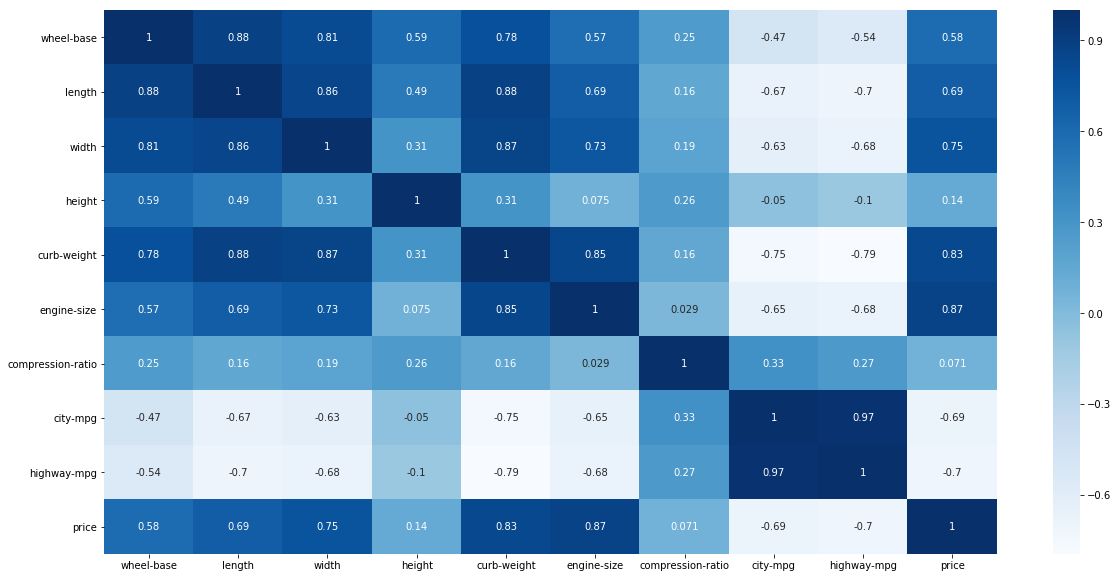

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(data_correlation,cbar=True , cmap ="Blues" , annot=True)

Text(0, 0.5, 'Highway Mileage')

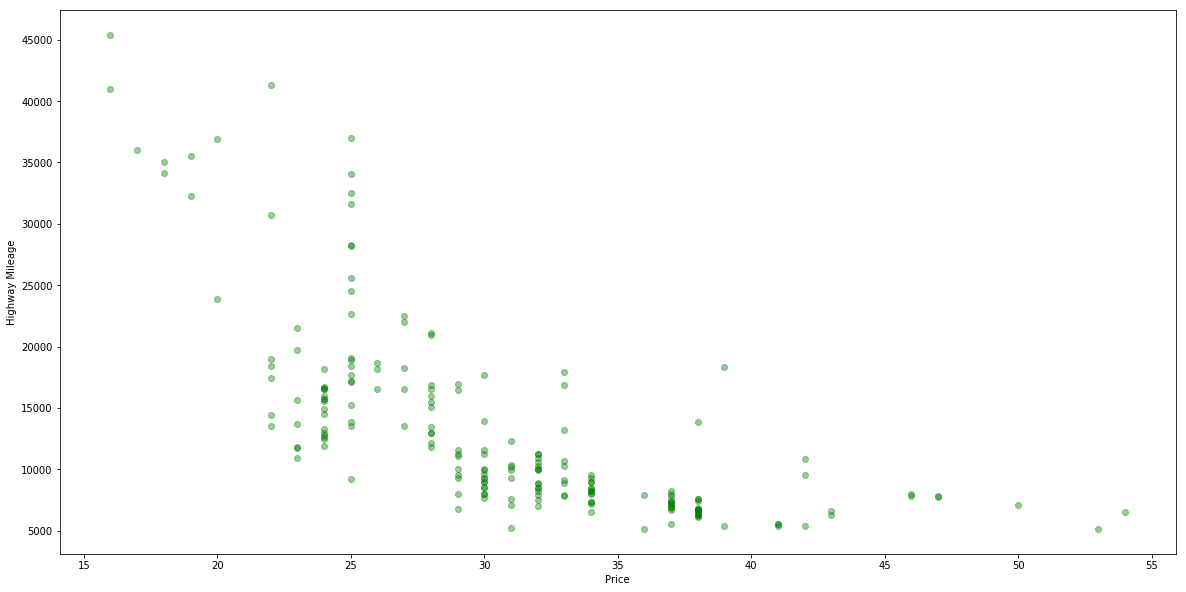

In [22]:
plt.figure(figsize=(20,10))
plt.scatter(data_numeric['highway-mpg'],data_numeric['price'] ,alpha=0.4 ,c ='green',marker='o')
plt.xlabel('Price')
plt.ylabel('Highway Mileage')

In [23]:
data['symboling'] = data['symboling'].astype('object')

In [24]:
data['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64

In [25]:
data['make'] = data['make'].apply(lambda x : "".join(x.split("-")))

In [26]:
data['make'].value_counts()

toyota          32
nissan          18
mazda           17
mitsubishi      13
honda           13
subaru          12
volkswagen      12
peugot          11
volvo           11
dodge            9
bmw              8
mercedesbenz     8
plymouth         7
saab             6
audi             6
porsche          4
chevrolet        3
alfaromero       3
jaguar           3
isuzu            2
renault          2
mercury          1
Name: make, dtype: int64

In [27]:
data.describe()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null object
normalized-losses    201 non-null object
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-nu

In [29]:
data['normalized-losses'].value_counts()

?      37
161    11
91      8
150     7
134     6
128     6
104     6
85      5
65      5
74      5
168     5
103     5
95      5
102     5
94      5
148     4
122     4
93      4
118     4
106     4
125     3
101     3
137     3
115     3
83      3
154     3
158     2
81      2
197     2
89      2
87      2
153     2
119     2
188     2
108     2
145     2
194     2
113     2
129     2
192     2
164     2
110     2
90      1
231     1
121     1
256     1
107     1
142     1
77      1
78      1
98      1
186     1
Name: normalized-losses, dtype: int64

In [30]:
data.drop(columns='normalized-losses' , inplace=True , axis=1)

In [31]:
data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfaromero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfaromero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfaromero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [66]:
x = data

In [67]:
data_categorical = x.select_dtypes(include=['object'])
data_categorical.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,3,alfaromero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,3,alfaromero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
2,1,alfaromero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500


##### Some more cleaning

In [68]:
a = data_categorical[data_categorical['horsepower']=='?']

In [69]:
a['horsepower'].value_counts()

?    2
Name: horsepower, dtype: int64

In [70]:
m = data_categorical[data_categorical['horsepower']!='?']

In [71]:
mean  = pd.to_numeric(m['horsepower']).mean()

In [72]:
data_categorical['horsepower'] = data_categorical['horsepower'].replace({'?':mean})

H:\ML_Test\test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Important : Check for ? value in dataframe

In [85]:
data_categorical.apply(lambda x : '?' in data_categorical.values,axis=1).any()

False

In [74]:
mean_rpm = pd.to_numeric(data_categorical[data_categorical['peak-rpm']!='?']['peak-rpm']).mean()
mean_rpm

5117.587939698493

In [75]:
data_categorical['peak-rpm'] = data_categorical['peak-rpm'].replace({'?':mean_rpm})

H:\ML_Test\test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
data_categorical['stroke'].value_counts()

3.4     19
3.15    14
3.23    14
3.03    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.58     6
3.5      6
3.41     6
3.27     6
3.07     6
3.19     6
3.64     5
3.52     5
3.54     4
?        4
3.86     4
3.47     4
2.9      3
3.11     3
3.9      3
3.1      2
4.17     2
2.8      2
2.68     2
3.08     2
2.19     2
2.87     1
3.16     1
2.36     1
3.12     1
2.07     1
3.21     1
2.76     1
Name: stroke, dtype: int64

In [77]:
mean_stroke = pd.to_numeric(data_categorical[data_categorical['stroke']!='?']['stroke']).mean()
mean_stroke

3.256903553299492

In [78]:
data_categorical['stroke'] = data_categorical['stroke'].replace({'?':mean_stroke})

H:\ML_Test\test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
data_categorical['bore'].value_counts()

3.62    23
3.19    20
3.15    15
2.97    12
3.03    10
3.46     9
3.31     8
3.43     8
3.78     8
3.27     7
2.91     7
3.05     6
3.54     6
3.58     6
3.39     6
3.01     5
3.7      5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.24     2
3.47     2
3.8      2
3.63     2
3.5      2
3.33     2
3.34     1
3.13     1
2.92     1
3.76     1
3.94     1
2.54     1
3.6      1
2.68     1
3.08     1
3.61     1
2.99     1
Name: bore, dtype: int64

In [80]:
mean_bore = pd.to_numeric(data_categorical[data_categorical['bore']!='?']['bore']).mean()
mean_bore

3.3307106598984766

In [81]:
data_categorical['bore'] = data_categorical['bore'].replace({'?':mean_bore})

H:\ML_Test\test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
data_categorical = data_categorical[data_categorical['num-of-doors']!="?"]

In [83]:
data_categorical['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [84]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 15 columns):
symboling           199 non-null object
make                199 non-null object
fuel-type           199 non-null object
aspiration          199 non-null object
num-of-doors        199 non-null object
body-style          199 non-null object
drive-wheels        199 non-null object
engine-location     199 non-null object
engine-type         199 non-null object
num-of-cylinders    199 non-null object
fuel-system         199 non-null object
bore                199 non-null object
stroke              199 non-null object
horsepower          199 non-null object
peak-rpm            199 non-null object
dtypes: object(15)
memory usage: 24.9+ KB


In [88]:
data['bore']  = pd.to_numeric(data_categorical['bore'])
data['stroke']  = pd.to_numeric(data_categorical['stroke'])
data['horsepower']  = pd.to_numeric(data_categorical['horsepower'])
data['peak-rpm']  = pd.to_numeric(data_categorical['peak-rpm'])


data_categorical['bore']  = pd.to_numeric(data_categorical['bore'])
data_categorical['stroke']  = pd.to_numeric(data_categorical['stroke'])
data_categorical['horsepower']  = pd.to_numeric(data_categorical['horsepower'])
data_categorical['peak-rpm']  = pd.to_numeric(data_categorical['peak-rpm'])

In [89]:
data_categorical = data_categorical.select_dtypes(include=['object'])
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 11 columns):
symboling           199 non-null object
make                199 non-null object
fuel-type           199 non-null object
aspiration          199 non-null object
num-of-doors        199 non-null object
body-style          199 non-null object
drive-wheels        199 non-null object
engine-location     199 non-null object
engine-type         199 non-null object
num-of-cylinders    199 non-null object
fuel-system         199 non-null object
dtypes: object(11)
memory usage: 28.7+ KB


In [90]:
data_cat_dummies = pd.get_dummies(data_categorical,drop_first=True)
data_cat_dummies

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [91]:
x = data.drop(list(data_categorical.columns) ,axis =1)
x = pd.concat([x,data_cat_dummies],axis=1)

In [92]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 11 columns):
symboling           199 non-null object
make                199 non-null object
fuel-type           199 non-null object
aspiration          199 non-null object
num-of-doors        199 non-null object
body-style          199 non-null object
drive-wheels        199 non-null object
engine-location     199 non-null object
engine-type         199 non-null object
num-of-cylinders    199 non-null object
fuel-system         199 non-null object
dtypes: object(11)
memory usage: 28.7+ KB


In [93]:
x.dropna(axis=0,inplace=True)
X = x.drop(columns='price',axis=1)
Y = x['price']

In [94]:
X.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,98.822613,174.267839,65.896482,53.773869,2558.065327,127.045226,3.331924,3.255566,10.114171,103.601980,...,0.005025,0.005025,0.020101,0.321608,0.015075,0.095477,0.005025,0.457286,0.045226,0.005025
std,6.086103,12.323033,2.106373,2.446730,519.189151,41.703898,0.268538,0.317355,3.920762,37.448632,...,0.070888,0.070888,0.140698,0.468272,0.122160,0.294614,0.070888,0.499429,0.208324,0.070888
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.800000,64.150000,52.000000,2157.000000,97.500000,3.150000,3.110000,8.600000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,183.500000,66.750000,55.550000,2930.500000,143.000000,3.585000,3.410000,9.400000,116.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
from sklearn.preprocessing import scale

In [96]:
cols = X.columns

In [97]:
X = pd.DataFrame(scale(X))
X.columns = cols
X.describe()

H:\ML_Test\test\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
count,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,...,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02,1.990000e+02
mean,-2.606514e-15,9.104945e-16,3.967792e-15,-3.570567e-17,-3.838359e-16,1.338962e-16,1.553196e-15,1.410374e-15,-1.338962e-16,-4.173100e-16,...,2.231604e-17,2.231604e-17,1.785283e-17,-6.248491e-17,2.677925e-17,-1.785283e-17,2.231604e-17,3.570567e-17,-2.677925e-17,2.231604e-17
std,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,...,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00,1.002522e+00
min,-2.013347e+00,-2.698320e+00,-2.663630e+00,-2.447731e+00,-2.066230e+00,-1.587664e+00,-2.956461e+00,-3.745192e+00,-7.962802e-01,-1.488498e+00,...,-7.106691e-02,-7.106691e-02,-1.432230e-01,-6.885304e-01,-1.237179e-01,-3.248931e-01,-7.106691e-02,-9.179284e-01,-2.176429e-01,-7.106691e-02
25%,-7.120345e-01,-6.075350e-01,-8.312333e-01,-7.268246e-01,-7.744323e-01,-7.102392e-01,-6.791699e-01,-4.598414e-01,-3.871670e-01,-8.995449e-01,...,-7.106691e-02,-7.106691e-02,-1.432230e-01,-6.885304e-01,-1.237179e-01,-3.248931e-01,-7.106691e-02,-9.179284e-01,-2.176429e-01,-7.106691e-02
50%,-3.002266e-01,-8.687247e-02,-1.887047e-01,1.336287e-01,-2.781812e-01,-1.693605e-01,-8.184747e-02,1.087770e-01,-2.848887e-01,-2.302801e-01,...,-7.106691e-02,-7.106691e-02,-1.432230e-01,-6.885304e-01,-1.237179e-01,-3.248931e-01,-7.106691e-02,-9.179284e-01,-2.176429e-01,-7.106691e-02
75%,5.892785e-01,7.510687e-01,4.062293e-01,7.277511e-01,7.191483e-01,3.835376e-01,9.448004e-01,4.878560e-01,-1.826104e-01,3.319024e-01,...,-7.106691e-02,-7.106691e-02,-1.432230e-01,1.452369e+00,-1.237179e-01,-3.248931e-01,-7.106691e-02,1.089410e+00,-2.176429e-01,-7.106691e-02
max,3.636657e+00,2.752365e+00,2.904952e+00,2.469145e+00,2.911728e+00,4.782684e+00,2.270109e+00,2.888689e+00,3.294851e+00,4.240409e+00,...,1.407125e+01,1.407125e+01,6.982120e+00,1.452369e+00,8.082904e+00,3.077935e+00,1.407125e+01,1.089410e+00,4.594683e+00,1.407125e+01


In [98]:
X.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,-1.683901,-0.444828,-0.855031,-2.037991,-0.019436,0.071030,0.515475,-1.818208,-0.284889,0.198049,...,-0.071067,-0.071067,-0.143223,-0.68853,-0.123718,-0.324893,-0.071067,1.08941,-0.217643,-0.071067
1,-1.683901,-0.444828,-0.855031,-2.037991,-0.019436,0.071030,0.515475,-1.818208,-0.284889,0.198049,...,-0.071067,-0.071067,-0.143223,-0.68853,-0.123718,-0.324893,-0.071067,1.08941,-0.217643,-0.071067
2,-0.712034,-0.249580,-0.188705,-0.562929,0.511572,0.599889,-2.433804,0.677395,-0.284889,1.349185,...,-0.071067,-0.071067,-0.143223,-0.68853,-0.123718,-0.324893,-0.071067,1.08941,-0.217643,-0.071067
3,0.160998,0.189729,0.144458,0.215577,-0.426863,-0.433790,-0.529839,0.456266,-0.029193,-0.042886,...,-0.071067,-0.071067,-0.143223,-0.68853,-0.123718,-0.324893,-0.071067,1.08941,-0.217643,-0.071067
4,0.095109,0.189729,0.239648,0.215577,0.513503,0.215264,-0.529839,0.456266,-0.540584,0.305132,...,-0.071067,-0.071067,-0.143223,-0.68853,-0.123718,-0.324893,-0.071067,1.08941,-0.217643,-0.071067


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=42)

In [101]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
print(model.coef_)
print(model.intercept_)

[ 7.61938084e+02 -1.35055656e+03  1.13008647e+03 -5.91029289e+02
  3.42267895e+03  5.31680961e+03 -2.97804656e+03 -5.82972301e+02
 -7.54658452e+02  8.70162314e+01  4.13357895e+02 -5.35976661e+02
  6.24155035e+02  9.57645220e+02  1.64567672e+03  1.20668329e+03
  9.31302373e+02  1.02930761e+03  7.86915147e+02  1.64893956e+03
  1.19215180e+15 -2.40266202e+02  2.75187088e+02 -1.79824828e+02
  3.49310999e+02  4.46151961e+02  1.03557052e+03  1.02004504e+02
 -3.98595515e+02  5.55220119e+02  1.88966914e+15 -3.65622405e+02
  1.13683029e+15  7.32187500e+01  1.26537500e+03 -1.41944698e+15
 -4.55000000e+01  1.77187500e+02  7.35875000e+02 -1.80729031e+14
  6.10250000e+02 -2.33312500e+02 -8.74500000e+02 -1.57787500e+03
 -1.51806250e+03 -1.16396094e+03  2.25195312e+02  1.13656250e+03
 -1.71364681e+15 -1.96843886e+15  3.01375000e+02  1.57420864e+15
 -6.64703125e+02  1.56517163e+14 -3.34119597e+14 -6.34692307e+14
 -4.98076088e+14 -2.15222759e+14 -1.92958093e+10 -3.71160963e+14
  1.11400000e+03  1.57000

In [107]:
Y_pred = model.predict(X_test)

from sklearn.metrics import r2_score

print(r2_score(y_true = Y_test,y_pred=Y_pred))

-4.019409616917166e+22


In [104]:
from sklearn.feature_selection import RFE

In [105]:
model2 = LinearRegression()
rfe = RFE(model2,10)
rfe.fit(X_train,Y_train)

print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False False False  True False False
 False False False False False False False  True False False False False
  True False  True False False False False False False False False False
 False False False False False False False  True  True  True False False
  True False False False False False False False False False False False
 False False False False False False False]
[29 14  1 36  1 18 10 21 45  1 39 25 26  8  4  6  7  5 12  1 35 42 52 48
  1 31  1 50 37 24 15 40  3 57 11 43 58 49  9 22 32 44  2  1  1  1 46 13
  1 51 38 27 16 19 33 20 30 17 55 23 34 54 41 56 28 53 47]


In [106]:
Y_pred2 = rfe.predict(X_test)

print(r2_score(y_true = Y_test,y_pred=Y_pred2))

0.9018553192666575


In [108]:
from sklearn.metrics import mean_squared_error

In [109]:
print(mean_squared_error(Y_test,Y_pred2))

10936879.481987929


Text(0.5, 1.0, 'Error Term')

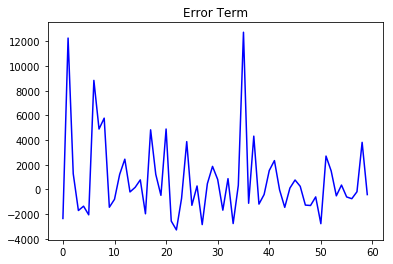

In [111]:
c = [i for i in range(len(Y_pred2))]
fig  = plt.figure()
plt.plot(c,Y_test-Y_pred2,color='blue',linewidth='1.5',linestyle='-')
plt.title('Error Term')

---------No of features:  6 -----------
R2 SCORE :  0.8917041863856074
MSE : 12068084.1086282
---------No of features:  7 -----------
R2 SCORE :  0.8952905456334538
MSE : 11668433.525634522
---------No of features:  8 -----------
R2 SCORE :  0.8988917535750285
MSE : 11267128.259243252
---------No of features:  9 -----------
R2 SCORE :  0.9000930427457778
MSE : 11133261.046213137
---------No of features:  10 -----------
R2 SCORE :  0.9018553192666575
MSE : 10936879.481987929
---------No of features:  11 -----------
R2 SCORE :  0.9036063421047658
MSE : 10741751.986462917
---------No of features:  12 -----------
R2 SCORE :  0.9075047562202407
MSE : 10307327.16554295
---------No of features:  13 -----------
R2 SCORE :  0.9052630372666464
MSE : 10557136.01758418
---------No of features:  14 -----------
R2 SCORE :  0.9035771242294282
MSE : 10745007.9182047
---------No of features:  15 -----------
R2 SCORE :  0.902985281678326
MSE : 10810960.658642093
---------No of features:  16 -----------


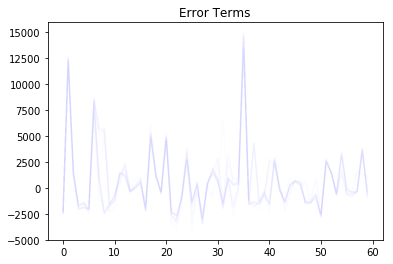

In [119]:
for i in range(6,20):
    model3 = LinearRegression()
    rfe = RFE(model3,i)
    rfe.fit(X_train,Y_train)
    y_pred_r = rfe.predict(X_test)
    print("---------No of features: ",i,"-----------")
    print("R2 SCORE : ",r2_score(y_true=Y_test,y_pred=y_pred_r))
    print("MSE :",mean_squared_error(Y_test,y_pred_r))
    

Text(0, 0.5, 'Index')

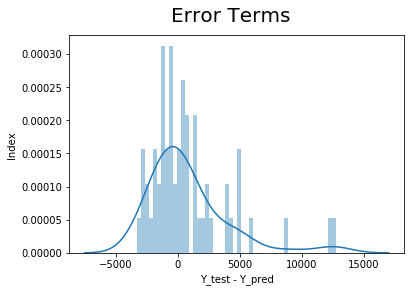

In [120]:
fig  = plt.figure()
sns.distplot((Y_test - Y_pred2),bins=50)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Y_test - Y_pred')
plt.ylabel('Index')

In [121]:
np.mean(Y_test-Y_pred2)

789.3056346369704

In [124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 67 columns):
wheel-base                 199 non-null float64
length                     199 non-null float64
width                      199 non-null float64
height                     199 non-null float64
curb-weight                199 non-null float64
engine-size                199 non-null float64
bore                       199 non-null float64
stroke                     199 non-null float64
compression-ratio          199 non-null float64
horsepower                 199 non-null float64
peak-rpm                   199 non-null float64
city-mpg                   199 non-null float64
highway-mpg                199 non-null float64
symboling_-1               199 non-null float64
symboling_0                199 non-null float64
symboling_1                199 non-null float64
symboling_2                199 non-null float64
symboling_3                199 non-null float64
make_audi                  199 

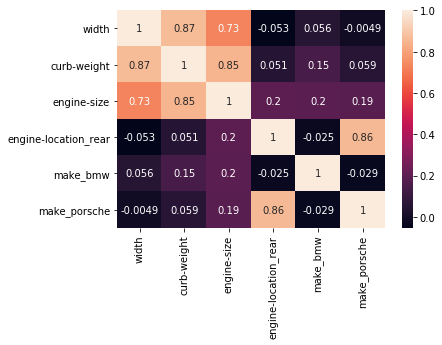

In [126]:
predictors = ['width','curb-weight','engine-size','engine-location_rear','make_bmw','make_porsche']

cors = X.loc[:,list(predictors)].corr()
sns.heatmap(cors,annot=True)

In [133]:
!pip install patsy

In [144]:
import statsmodels.api as sm

rfe = RFE(model2,10)
rfe.fit(X_train,Y_train)

cols_10 = X_train.columns[rfe.support_]
X_train_rfe_10 = X_train[cols_10]


X_train_rfe_10 = sm.add_constant(X_train_rfe_10)
X_train_rfe_10.head()
rfe.support_.sum()

10

In [148]:
print(X_train_rfe_10.shape)
print(Y_train.shape)

(139, 11)
(139,)


In [149]:
sm_10 = sm.OLS(list(Y_train),X_train_rfe_10).fit()
print(sm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     137.6
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           1.89e-63
Time:                        23:13:55   Log-Likelihood:                -1241.2
No. Observations:                 139   AIC:                             2504.
Df Residuals:                     128   BIC:                             2537.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.3e+04 

In [150]:
model3 = LinearRegression()

rfe7 = RFE(model3,7)
rfe7.fit(X_train,Y_train)

cols_7 = X_train.columns[rfe7.support_]
X_train_rfe_7 = X_train[cols_7]


X_train_rfe_7 = sm.add_constant(X_train_rfe_7)
X_train_rfe_7.head()
rfe7.support_.sum()

7

In [151]:
sm_7 = sm.OLS(list(Y_train),X_train_rfe_7).fit()
print(sm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     192.0
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           1.20e-65
Time:                        23:22:21   Log-Likelihood:                -1244.1
No. Observations:                 139   AIC:                             2504.
Df Residuals:                     131   BIC:                             2528.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.299e+04 

In [154]:
n_features = list(range(4,20))

adjusted_r2 = []
test_r2 = []

for i in range(4,20):
    mod = LinearRegression()
    
    rfe_n = RFE(mod,i)
    rfe_n.fit(X_train,Y_train)
    
    col_n = X_train.columns[rfe_n.support_]
    X_train_rfe_n = X_train[col_n]
    
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)
    
    mod_n = sm.OLS(list(Y_train),X_train_rfe_n).fit()
    adjusted_r2.append(mod_n.rsquared_adj)
    
    X_test_rfe_n = X_test[col_n]
    
    X_test_rfe_n = sm.add_constant(X_test_rfe_n,has_constant='add')
    y_pred = mod_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(Y_test,y_pred))

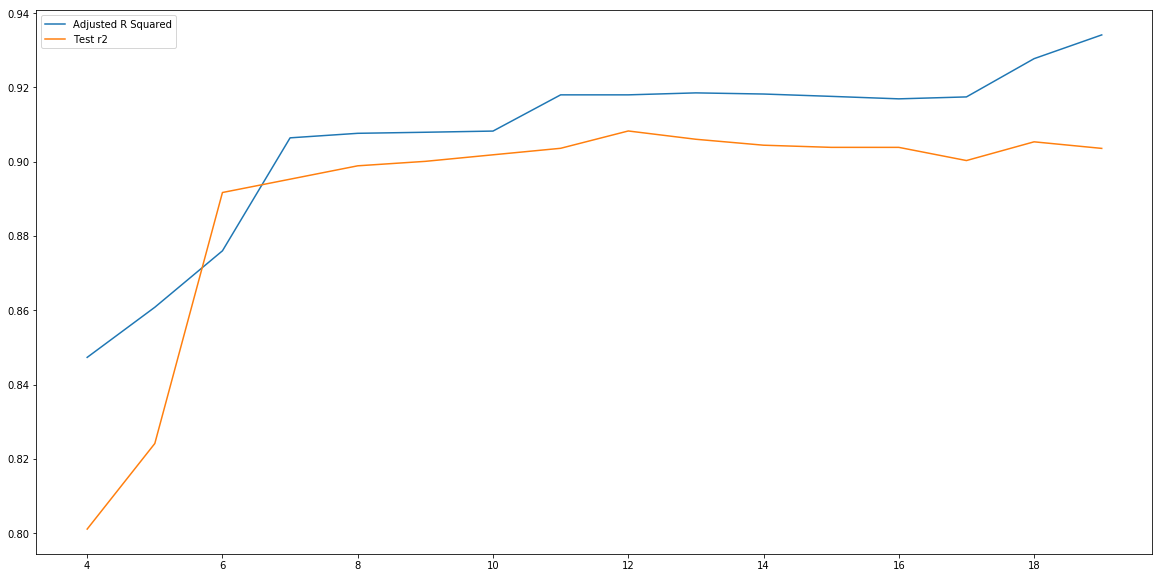

In [157]:
plt.figure(figsize=(20,10))
plt.plot(n_features,adjusted_r2,label="Adjusted R Squared")

plt.plot(n_features,test_r2,label="Test r2")
plt.legend(loc="upper left")